поиск гиперпараметров

In [1]:
import processing as pr
from filters.blur import *
from filters.distributions import *
from filters.noise import *
from filters.denoise import *
from implementations.richardson_lucy import RihardsonLucy
from implementations.MAP import MAP

import cv2 as cv
import numpy as np

#загружаем изображения
frame = pr.Processing('images','dataset_blurred','restored')
frame.changescale(False)

frame.read_one('3096.png')
# frame.read_one('fly.jpg')
# frame.read_one('im1.png')
# frame.read_one('im1.png')

#создаем фильтры
fl_gauss = GaussianNoise(3.0)
fl_motion = MotionBlur(gaussian_distribution, param=9.0,angle=45,kernel_length=21)
fl_defocus = DefocusBlur(gaussian_distribution, param=2,kernel_size = 61)

#создаем модели
from algorithms.HQMotionBlurRestoration.HQMBR import HQMBR
from algorithms.HQMotionBlurRestoration.convolve  import create_line_psf
predict_hqmbr = create_line_psf(np.pi, 1, (31, 31))
alg_hqmbr = HQMBR(1,predict_psf= predict_hqmbr, MAX_ITER=5)

from algorithms._23ms410_Blind_Deconvolution import _23ms410BlindDeconvolution
alg_23ms410BlindDeconvolution = _23ms410BlindDeconvolution()

from algorithms._2924878374_Variational_Bayesian_Blind_Deconvolution_Using_a_Total_Variation_Prior import TV1DeconvolutionAlgorithm
alg_TV1DeconvolutionAlgorithm = TV1DeconvolutionAlgorithm()

from algorithms.adamalavi_Blind_motion_deblurring_for_license_plates import AdamalaviBlindMotionDeblurringForLicensePlates
alg_AdamalaviBlindMotionDeblurringForLicensePlates = AdamalaviBlindMotionDeblurringForLicensePlates()

from algorithms.ADY_YDA_Iterative_Blind_Image_Deconvolution import ADYYDAIterativeBlindImageDeconvolution
alg_ADYYDAIterativeBlindImageDeconvolution = ADYYDAIterativeBlindImageDeconvolution()

from algorithms.axium_Blind_Image_Deconvolution_using_Deep_Generative_Priors import AxiumBlindImageDeconvolutionUsingDeepGenerativePriors
alg_AxiumBlindImageDeconvolutionUsingDeepGenerativePriors = AxiumBlindImageDeconvolutionUsingDeepGenerativePriors()

from algorithms.CEA_jiangming_DecGMCA import CEAJiangmingDecGMCA
alg_CEAJiangmingDecGMCA = CEAJiangmingDecGMCA(max_iter=2,sources=2)

from algorithms.ceciledellavalle_BlindDeconvolution import CeciledellavalleBlindDeconvolution
alg_CeciledellavalleBlindDeconvolution = CeciledellavalleBlindDeconvolution()

from algorithms.deu439_sbl_blind_deconvolution import Deu439SblBlindDeconvolution
alg_Deu439SblBlindDeconvolution = Deu439SblBlindDeconvolution(iterations=3)

from algorithms.dragos2001_Total_Variation_Blind_Deconvolution import Dragos2001TotalVariationBlindDeconvolution
alg_Dragos2001TotalVariationBlindDeconvolution = Dragos2001TotalVariationBlindDeconvolution()

from algorithms.Drorharush_SBD import DrorharushSBD
alg_DrorharushSBD = DrorharushSBD()

from algorithms.fabioviggiano_BlindDeconvolution import FabioviggianoBlindDeconvolution
alg_FabioviggianoBlindDeconvolution = FabioviggianoBlindDeconvolution()

from algorithms.gandor26_blind_deconvolution_through_a_single_image import Gandor26BlindDeconvolutionThroughASingleImageDeconvolutionAlgorithm
alg_Gandor26BlindDeconvolutionThroughASingleImageDeconvolutionAlgorithm = Gandor26BlindDeconvolutionThroughASingleImageDeconvolutionAlgorithm()

from algorithms.GeekLogan_pyBlindRL import GeekLoganPyBlindRL
alg_GeekLoganPyBlindRL = GeekLoganPyBlindRL()

from algorithms.gpl27_deblur import Gpl27DeblurDeconvolutionAlgorithm
alg_Gpl27DeblurDeconvolutionAlgorithm = Gpl27DeblurDeconvolutionAlgorithm()

from algorithms.jeffreysblake_funsearch_blind_deconvolution import JeffreysblakeFunsearchBlindDeconvolution
alg_JeffreysblakeFunsearchBlindDeconvolution = JeffreysblakeFunsearchBlindDeconvolution()

from algorithms.jtaoz_GKPILE_Deconvolution import JtaozGKPILEDeconvolution
alg_JtaozGKPILEDeconvolution = JtaozGKPILEDeconvolution(kernel_size=31)

from algorithms.luczeng_MotionBlur import LuczengMotionBlur
alg_LuczengMotionBlur = LuczengMotionBlur()

from algorithms.MaxMB_Image_Restoration_Wiener_Blind import MaxMBImageRestorationWienerBlind
alg_MaxMBImageRestorationWienerBlind = MaxMBImageRestorationWienerBlind()

from algorithms.muhammadhamzaazhar_Image_Enhancement_Filters import MuhammadhamzaazharImageEnhancementFilters
alg_MuhammadhamzaazharImageEnhancementFilters = MuhammadhamzaazharImageEnhancementFilters()

# unils.py не найден
# from algorithms.sanghviyashiitb_photon_limited_blind import SanghviyashiitbPhotonLimitedBlind
# alg_SanghviyashiitbPhotonLimitedBlind = SanghviyashiitbPhotonLimitedBlind()

# from algorithms.shan import #ярик, что тут импортить?

from algorithms.tianyishan_Blind_Deconvolution import TianyishanBlindDeconvolutionDeconvolutionAlgorithm
alg_TianyishanBlindDeconvolutionDeconvolutionAlgorithm = TianyishanBlindDeconvolutionDeconvolutionAlgorithm()

from algorithms.Tmodrzyk_richardson_lucy_python import TmodrzykRichardsonLucyPython
alg_TmodrzykRichardsonLucyPython = TmodrzykRichardsonLucyPython()

from algorithms.TobiasWolf_math_Blind_Deconvolution_MHDM import TobiasWolfMathBlindDeconvolutionMHDM
alg_TobiasWolfMathBlindDeconvolutionMHDM = TobiasWolfMathBlindDeconvolutionMHDM()

from algorithms.vipgugr_BCDSAR import VipgugrBCDSAR
alg_VipgugrBCDSAR = VipgugrBCDSAR()

from algorithms.warrenzha_blind_deconvolution import WarrenzhaBlindDeconvolution
alg_WarrenzhaBlindDeconvolution = WarrenzhaBlindDeconvolution()

c:\Users\User\AppData\Local\Programs\Python\Python310\lib\site-packages\tqdm\auto.py:21: TqdmWarning: IProgress not found. Please update jupyter and ipywidgets. See https://ipywidgets.readthedocs.io/en/stable/user_install.html
  from .autonotebook import tqdm as notebook_tqdm
d:\for_proga\franework_deconvolution\framework (9)\algorithms\HQMotionBlurRestoration\convolve.py:30: RuntimeWarning: divide by zero encountered in scalar divide
  p1 = (min(Y/np.tan(theta), X), min(X*np.tan(theta), Y))


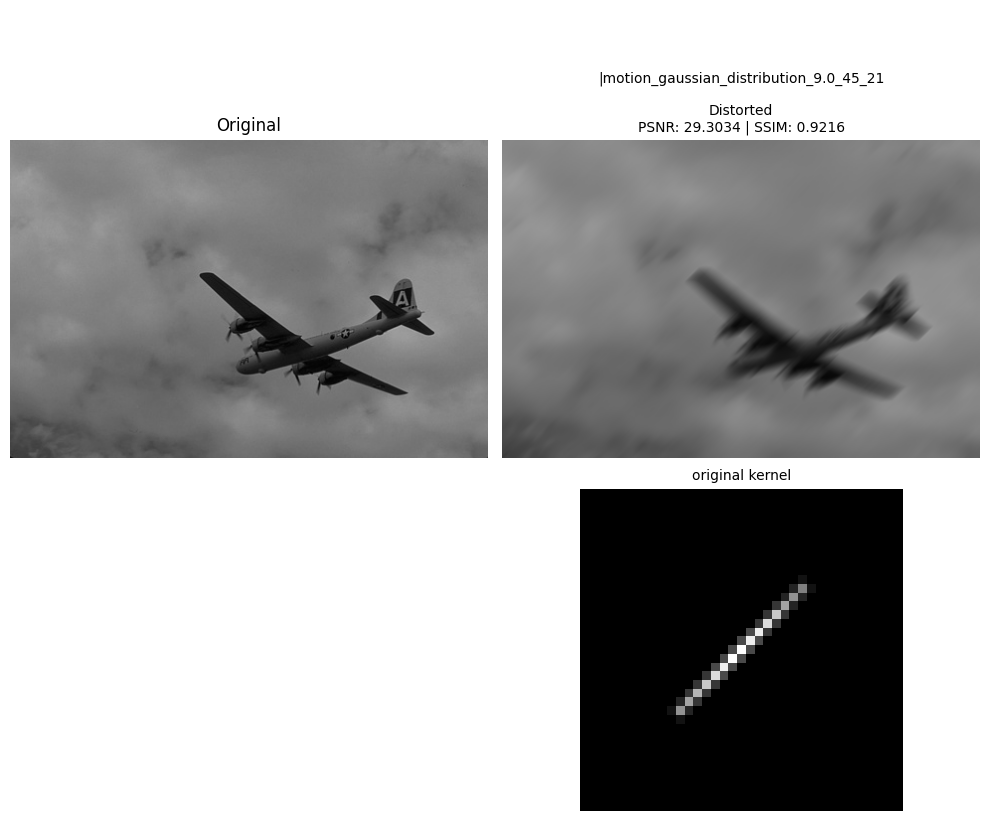

In [2]:
frame.filter(fl_motion)
# frame.show()
# frame.filter(fl_defocus)
# frame.filter(fl_gauss)
frame.show()

In [3]:
frame.process(alg_JtaozGKPILEDeconvolution)


SSIM calculation error: win_size exceeds image extent. Either ensure that your images are at least 7x7; or pass win_size explicitly in the function call, with an odd value less than or equal to the smaller side of your images. If your images are multichannel (with color channels), set channel_axis to the axis number corresponding to the channels.
Restored: 3096_GKPILE.png (PSNR: 26.15, SSIM: nan)


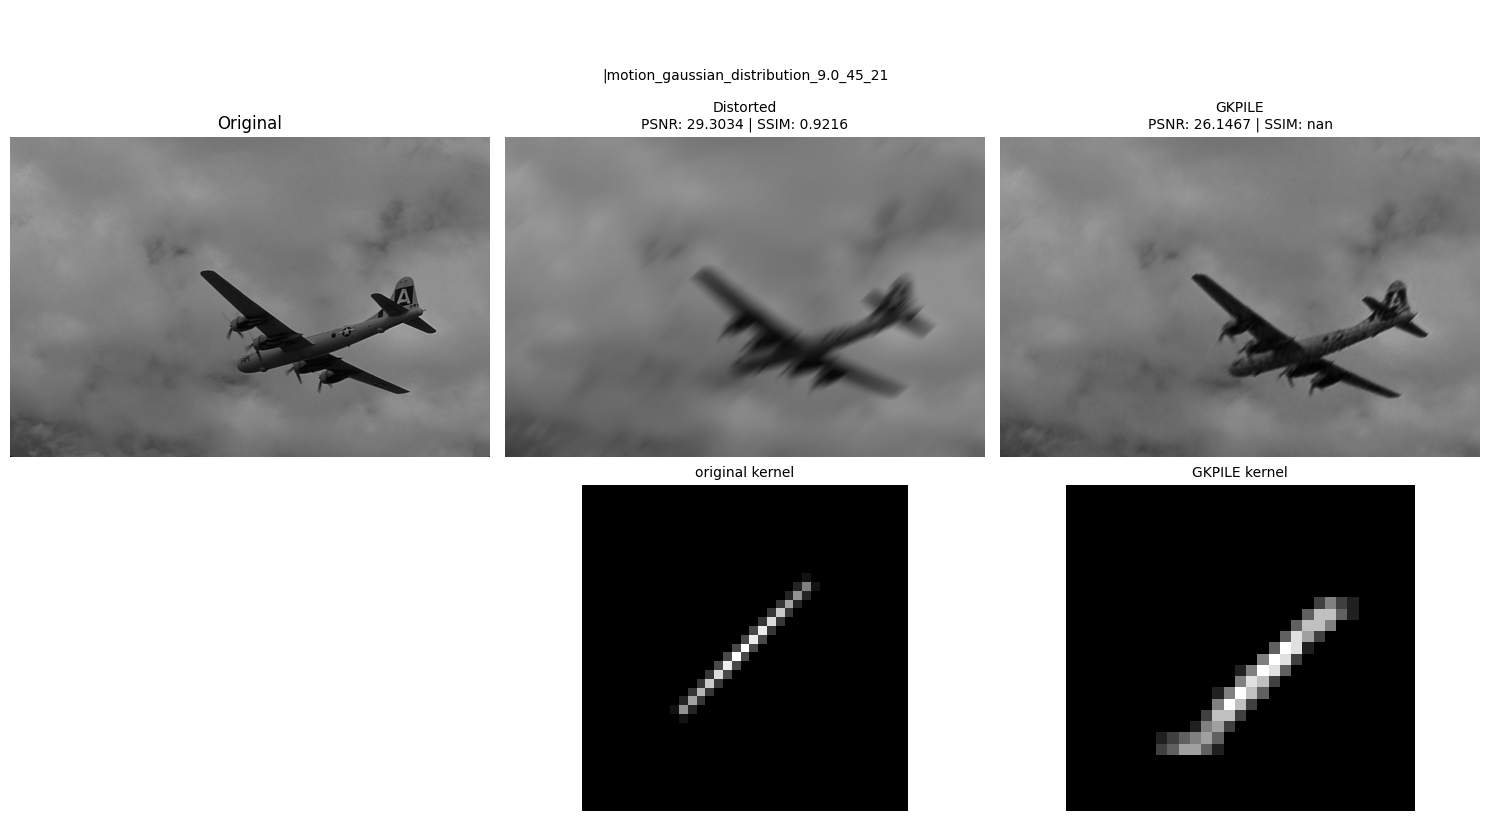

In [4]:
frame.show()
frame.unbind_restored()

In [7]:
img_restored = cv.imread('restored\\3096_GKPILE.png', cv.IMREAD_GRAYSCALE)
img_original = cv.imread('images\\3096.png', cv.IMREAD_GRAYSCALE)
img_blurred = cv.imread('dataset_blurred\\3096.png', cv.IMREAD_GRAYSCALE)

In [10]:
cv.imshow('tmp',img_blurred)
cv.waitKey()
cv.destroyAllWindows()

In [12]:
from metrics import *
print(SSIM(img_original,img_blurred))
print(SSIM(img_original,img_restored))

print(PSNR(img_original,img_blurred))
print(PSNR(img_original,img_restored))


0.9215967300139868
0.8816324598965287
29.30335107907392
26.146682497983498


In [ ]:
# нейросетевой метод
# метод на метрику SSIM
# работает на Deep Image Prior (DIP)
# alg_JtaozGKPILEDeconvolution
# похоже не имеет смыла смотреть гиперпараметры, так как с одними и теми же гиперпараметрами и одними и теми же картинками - разный результат
# хотя не исключаю, что где-то баг...
param_ranges = {
        'kernel_size': (31, 31), #размер ядра с обученной моделью: то есть размер ядра и нейронка для этого размера ядра неразрывно связаны
        'num_iterations':  (500,2000), #
        'reg_noise_std':  (1e-4,1e-2), #
        'learning_rate': (0.001,0.1), # параметр для обучения
        'weight_lr':  (5e-4,0.1), # параметр для обучения
        'milestone1': (1000,2999), # параметр для обучения меньше milestone2
        'milestone2':  (3000,3999), # параметр для обучения меньше milestone3
        'milestone3':  (4000,5999), # параметр для обучения
        'mse_switch': (100,1000), #шаг, с которого меняем метрику?
        'models_dir': (None, None),
        'device': (None,None)
} 
param_ranges_grid_tmp = {
    'kernel_size': [31,55,75], #??? почему по стандарту 21??? 
    'num_iterations':  (1000),
    'reg_noise_std':  [1e-6,1e-5,1e-3,1e-2,0.1,0.2,0.4], 
    'learning_rate': [1e-4, 1e-3, 0.01, 0.05, 0.1, 0.5, 1.0, 10.0], 
    'weight_lr':  [1e-4, 5e-4, 1e-3, 5e-3, 1e-2, 5e-2, 0.1, 0.5, 1.0, 10.0], 
    'milestone1': [1500, 2000, 2500, 2999], 
    'milestone2':  [3000,3500, 3999], 
    'milestone3':  [4000, 4500, 5000, 6000], 
    'mse_switch': [250, 500, 1000], 
} 
frame.process_hyperparameter_optimization(
    algorithm_processor=alg_JtaozGKPILEDeconvolution, 
    param_ranges=param_ranges, 
    n_trials=0,
    timeout=3600,
    logs=True
)

[I 2025-11-10 00:12:30,147] A new study created in memory with name: no-name-399971a8-b998-46fc-b25c-5d965611e088
Best trial: 0. Best value: 19.8088:  50%|█████     | 1/2 [13:47<13:47, 827.30s/it, 827.30/3600 seconds]

[I 2025-11-10 00:26:17,445] Trial 0 finished with value: 19.80882374474714 and parameters: {'kernel_size': 31, 'num_iterations': 1062, 'reg_noise_std': 0.00951207163345817, 'learning_rate': 0.07346740023932911, 'weight_lr': 0.060066519177605145, 'milestone1': 1312, 'milestone2': 3155, 'milestone3': 4116, 'mse_switch': 880, 'models_dir': None, 'device': None}. Best is trial 0 with value: 19.80882374474714.


Best trial: 0. Best value: 19.8088: 100%|██████████| 2/2 [36:37<00:00, 1098.88s/it, 2197.75/3600 seconds]


[I 2025-11-10 00:49:07,897] Trial 1 finished with value: 15.318064531002236 and parameters: {'kernel_size': 31, 'num_iterations': 1749, 'reg_noise_std': 0.002202157195714934, 'learning_rate': 0.01900067175350296, 'weight_lr': 0.018748748730416667, 'milestone1': 1608, 'milestone2': 3524, 'milestone3': 4863, 'mse_switch': 362, 'models_dir': None, 'device': None}. Best is trial 0 with value: 19.80882374474714.
Optimization completed:
   Best PSNR: 19.8088
   Best params: {'kernel_size': 31, 'num_iterations': 1062, 'reg_noise_std': 0.00951207163345817, 'learning_rate': 0.07346740023932911, 'weight_lr': 0.060066519177605145, 'milestone1': 1312, 'milestone2': 3155, 'milestone3': 4116, 'mse_switch': 880, 'models_dir': None, 'device': None}
   Number of tests: 2
Best params:
   kernel_size: 31
   models_dir: D:\for_proga\franework_deconvolution\framework (9)\algorithms\jtaoz_GKPILE_Deconvolution\source\models
   num_iterations: 1062
   reg_noise_std: 0.00951207163345817
   learning_rate: 0.073

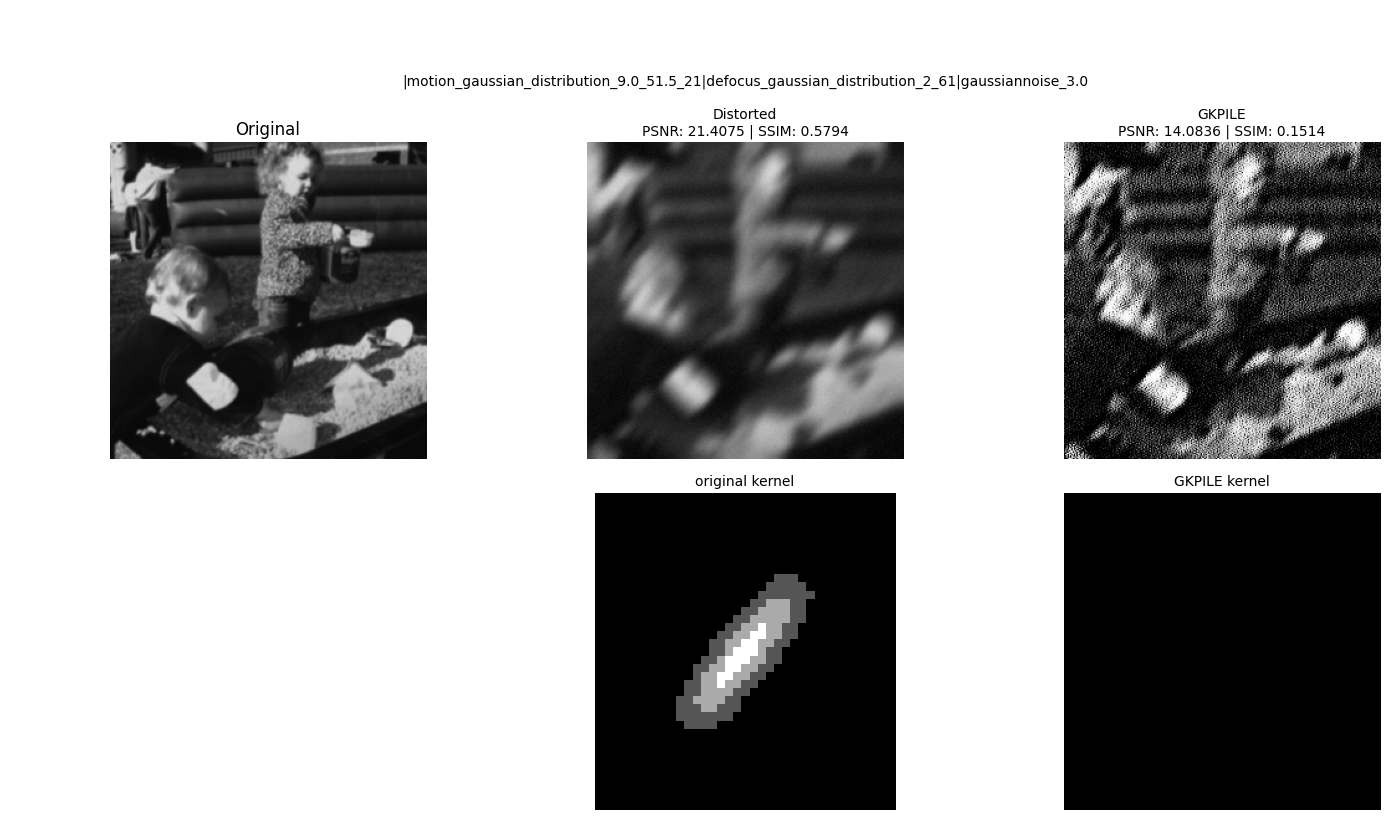

In [8]:
# denoise_nonlocal = NonLocalMeans(fast=True, sigma_coef = 0.0025, patch_size=5, patch_distance=6)
# frame.filter(denoise_nonlocal)
# frame.show()

frame.show()
frame.unbind_restored()

In [3]:
#нейросетевой метод, очень тупой: предугадывает поворот и размер ядра смаза, а потом винером делает деконволюцию
#деконволбюцию численную можно взять _run_wiener
#AdamalaviBlindMotionDeblurringForLicensePlates
param_ranges = {
    'angle_model_path': (None, None),#это определяет модель, моделей у нас больше нет, так что none
    'length_model_path': (None,None), #это определяет модель, моделей у нас больше нет, так что none
    'noise':  (1e-6, 3.0), #промежуток [1e-6, ...] используется в filt = psf_dft / (psf_sq + noise)[..., np.newaxis] 
    'psf_size':(21,21), #размер полученного ядра
    'inference_size': ((640, 480),(640, 480)), #сводит изображение до такого изображения
    'fft_size': ((224, 224),(224, 224)), #уменьшает fft (спектр картинки до этого значения)
    'angle_top_k': (3,5) #алгос предсказывает несколько углов, а потом берет angle_top_k предсказанных углов, а потом усредняет их
} 
param_ranges_grid_tmp = {
    'angle_model_path': None,
    'length_model_path': None,
    'noise':  [1e-6,1e-5,0.01,0.02, 0.05, 0.1, 0.2, 0.3, 0.5, 0.75, 1.0, 1.5, 3.0, 5.0, 10.0, 15.0, 20.0],
    'psf_size': [5,10,15,21,23,25,27,29,31,35,37,39,41,43,45,47,50,75,100,150,200,300],
    'inference_size': [(80, 60),(160, 120),(240, 180),(320, 240),(400, 300),(480, 360),(560, 420),(640, 480),(720, 540),(800, 600)],
    'fft_size': [(11, 11),(22, 22),(44, 44),(88, 88),(168, 168),(224, 224),(352, 352)],
    'angle_top_k':[3,5,7,10,12,15],
} 
frame.process_hyperparameter_optimization(
    algorithm_processor=alg_AdamalaviBlindMotionDeblurringForLicensePlates, 
    param_ranges=param_ranges, 
    n_trials=3,
    timeout=3600,
    logs=True
)

[I 2025-11-10 02:25:43,942] A new study created in memory with name: no-name-0a02e598-a770-4a47-b2c6-8e1306581baa
  0%|          | 0/3 [00:00<?, ?it/s]c:\Users\User\AppData\Local\Programs\Python\Python310\lib\site-packages\optuna\distributions.py:518: UserWarning: Choices for a categorical distribution should be a tuple of None, bool, int, float and str for persistent storage but contains (640, 480) which is of type tuple.
  warnings.warn(message)
c:\Users\User\AppData\Local\Programs\Python\Python310\lib\site-packages\optuna\distributions.py:518: UserWarning: Choices for a categorical distribution should be a tuple of None, bool, int, float and str for persistent storage but contains (224, 224) which is of type tuple.
  warnings.warn(message)
c:\Users\User\AppData\Local\Programs\Python\Python310\lib\site-packages\keras\src\layers\convolutional\base_conv.py:113: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Inpu

D:\for_proga\franework_deconvolution\framework (9)\algorithms\adamalavi_Blind_motion_deblurring_for_license_plates\source\pretrained_models\angle_model.hdf5


Best trial: 0. Best value: 11.4838:  33%|███▎      | 1/3 [00:01<00:03,  1.56s/it, 1.56/3600 seconds]

angle:  48.0
length:  24.280569076538086
[I 2025-11-10 02:25:45,498] Trial 0 finished with value: 11.483810714368 and parameters: {'angle_model_path': None, 'length_model_path': None, 'noise': 0.4680567653086691, 'psf_size': 21, 'inference_size': (640, 480), 'fft_size': (224, 224), 'angle_top_k': 5}. Best is trial 0 with value: 11.483810714368.
D:\for_proga\franework_deconvolution\framework (9)\algorithms\adamalavi_Blind_motion_deblurring_for_license_plates\source\pretrained_models\angle_model.hdf5


Best trial: 0. Best value: 11.4838:  67%|██████▋   | 2/3 [00:01<00:00,  1.32it/s, 1.76/3600 seconds]

angle:  48.0
length:  24.280569076538086
[I 2025-11-10 02:25:45,703] Trial 1 finished with value: 11.389954817801568 and parameters: {'angle_model_path': None, 'length_model_path': None, 'noise': 0.5454757197963347, 'psf_size': 21, 'inference_size': (640, 480), 'fft_size': (224, 224), 'angle_top_k': 3}. Best is trial 0 with value: 11.483810714368.
D:\for_proga\franework_deconvolution\framework (9)\algorithms\adamalavi_Blind_motion_deblurring_for_license_plates\source\pretrained_models\angle_model.hdf5
angle:  48.0
length:  24.280569076538086


Best trial: 0. Best value: 11.4838: 100%|██████████| 3/3 [00:01<00:00,  1.53it/s, 1.96/3600 seconds]

[I 2025-11-10 02:25:45,900] Trial 2 finished with value: 10.997251344705685 and parameters: {'angle_model_path': None, 'length_model_path': None, 'noise': 1.3682104965811235, 'psf_size': 21, 'inference_size': (640, 480), 'fft_size': (224, 224), 'angle_top_k': 3}. Best is trial 0 with value: 11.483810714368.
Optimization completed:
   Best PSNR: 11.4838
   Best params: {'angle_model_path': None, 'length_model_path': None, 'noise': 0.4680567653086691, 'psf_size': 21, 'inference_size': (640, 480), 'fft_size': (224, 224), 'angle_top_k': 5}
   Number of tests: 3
Best params:
   angle_model_path: D:\for_proga\franework_deconvolution\framework (9)\algorithms\adamalavi_Blind_motion_deblurring_for_license_plates\source\pretrained_models\angle_model.hdf5
   length_model_path: D:\for_proga\franework_deconvolution\framework (9)\algorithms\adamalavi_Blind_motion_deblurring_for_license_plates\source\pretrained_models\length_model.hdf5
   noise: 0.4680567653086691
   psf_size: 21
   inference_size: (

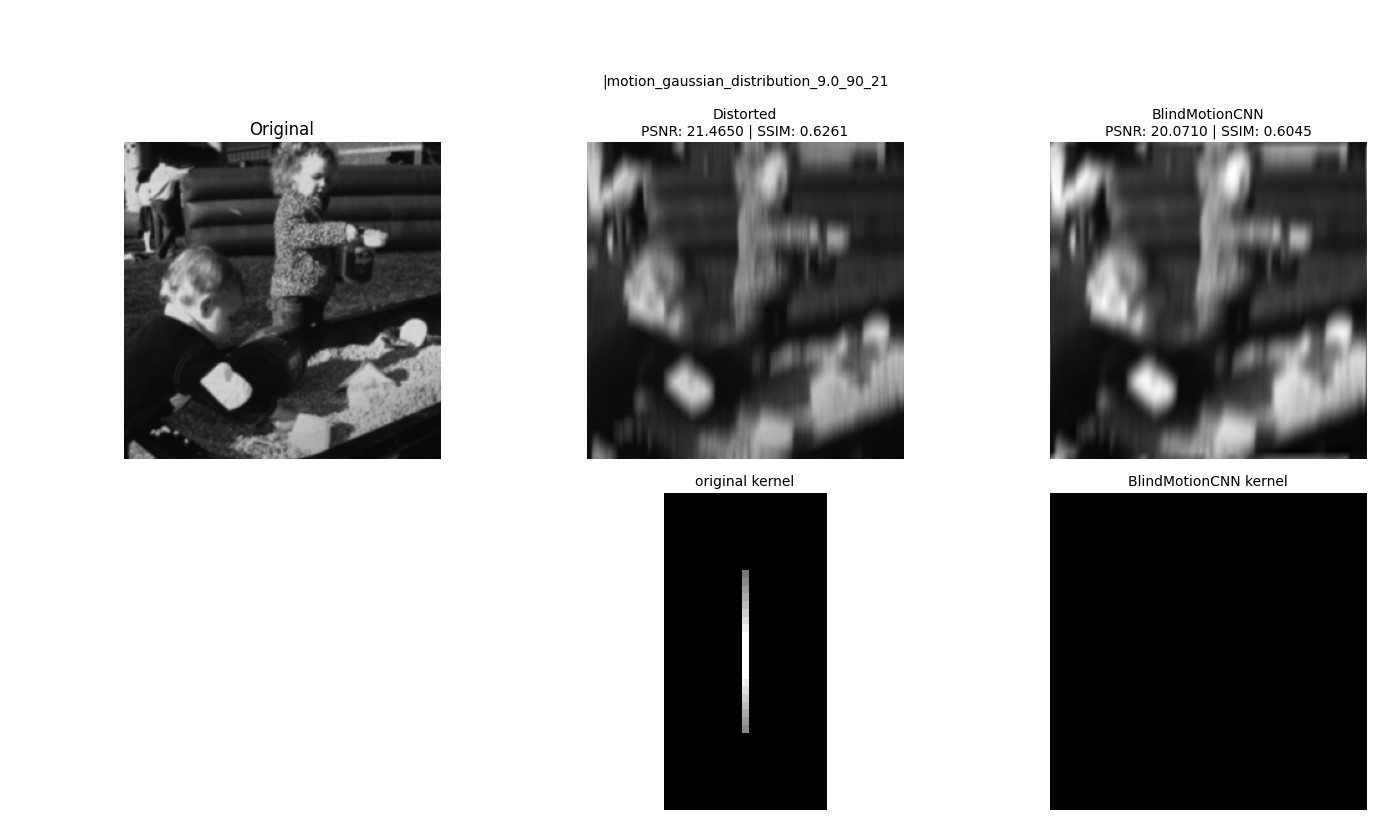

In [4]:
frame.show()
frame.unbind_restored()

In [3]:
alg_AdamalaviBlindMotionDeblurringForLicensePlates.import_param_from_file('parametrs\\BlindMotionCNN_1.json')

D:\for_proga\franework_deconvolution\framework (9)\algorithms\adamalavi_Blind_motion_deblurring_for_license_plates\source\pretrained_models\angle_model.hdf5
angle:  105.25
length:  0.0
SSIM calculation error: win_size exceeds image extent. Either ensure that your images are at least 7x7; or pass win_size explicitly in the function call, with an odd value less than or equal to the smaller side of your images. If your images are multichannel (with color channels), set channel_axis to the axis number corresponding to the channels.
{'original': 'images\\im1.png', 'blurred': np.str_('dataset_blurred\\im1_22.png'), 'filter': '|motion_gaussian_distribution_9.0_51.5_21|defocus_gaussian_distribution_2_61', 'blurred kernel': 'dataset_blurred\\kernel_im1_22.png', 'blurred psnr': np.float64(21.488139096162726), 'blurred ssim': np.float64(0.6152140599552105), 'algorithm': 'BlindMotionCNN', 'restored': 'restored\\im1_22_BlindMotionCNN_1.png', 'restored kernel': 'restored\\im1_22_BlindMotionCNN_kerne

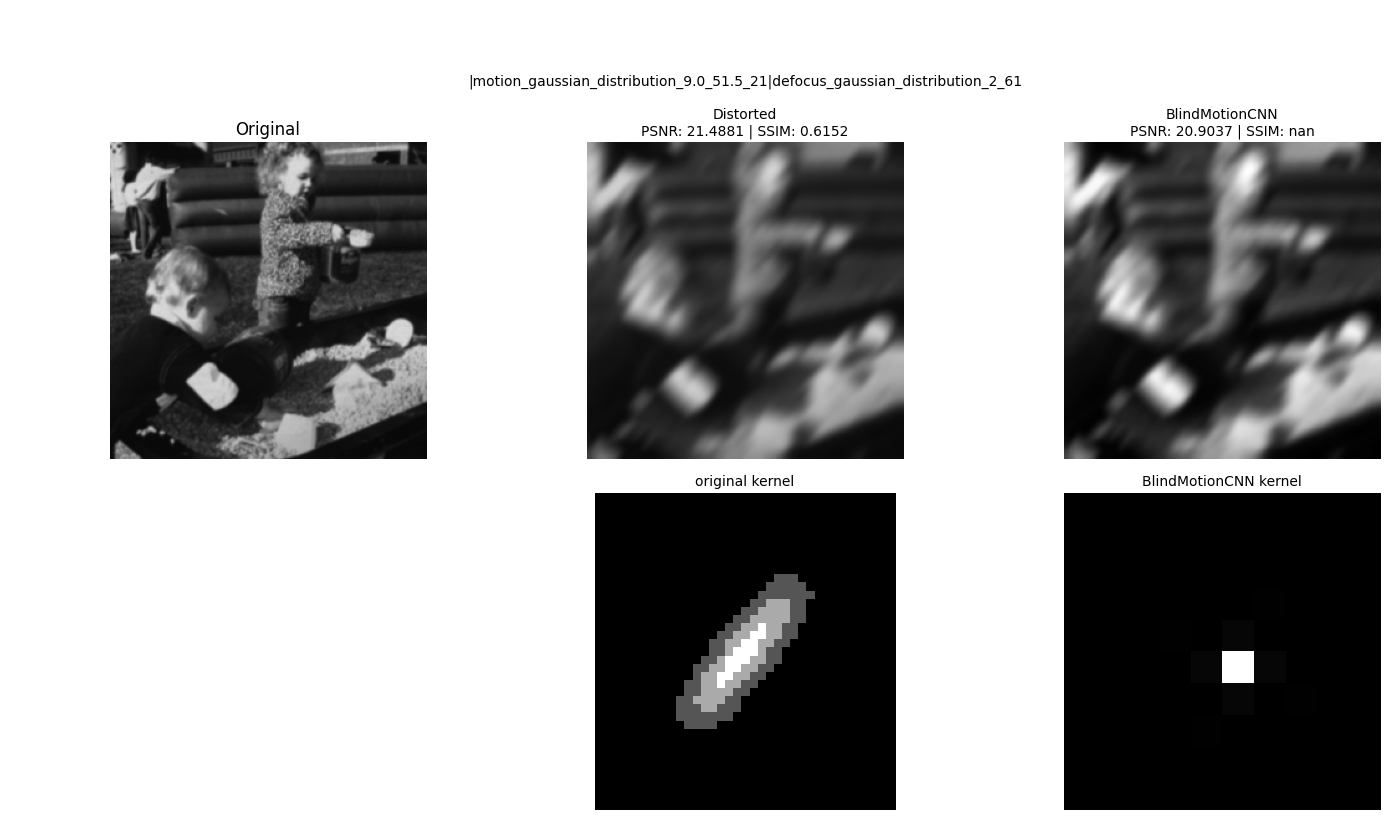

In [5]:
frame.process(alg_AdamalaviBlindMotionDeblurringForLicensePlates, metadata=True)
frame.show()
frame.unbind_restored()

In [4]:
frame.clear_output_directory()

Deleted: dataset_blurred\3096.png
Deleted: dataset_blurred\im1.png
Deleted: dataset_blurred\im1_1.png
Deleted: dataset_blurred\im1_10.png
Deleted: dataset_blurred\im1_11.png
Deleted: dataset_blurred\im1_12.png
Deleted: dataset_blurred\im1_13.png
Deleted: dataset_blurred\im1_14.png
Deleted: dataset_blurred\im1_15.png
Deleted: dataset_blurred\im1_16.png
Deleted: dataset_blurred\im1_17.png
Deleted: dataset_blurred\im1_18.png
Deleted: dataset_blurred\im1_19.png
Deleted: dataset_blurred\im1_2.png
Deleted: dataset_blurred\im1_20.png
Deleted: dataset_blurred\im1_21.png
Deleted: dataset_blurred\im1_22.png
Deleted: dataset_blurred\im1_23.png
Deleted: dataset_blurred\im1_24.png
Deleted: dataset_blurred\im1_25.png
Deleted: dataset_blurred\im1_26.png
Deleted: dataset_blurred\im1_27.png
Deleted: dataset_blurred\im1_28.png
Deleted: dataset_blurred\im1_29.png
Deleted: dataset_blurred\im1_3.png
Deleted: dataset_blurred\im1_30.png
Deleted: dataset_blurred\im1_31.png
Deleted: dataset_blurred\im1_32.png
